In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
# sandbox

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
# these values should be defined by user
data_filename = "data.csv"
PAR1_COL = 0
PAR2_COL = 1
PERFORMANCE_COL = 2

In [5]:
# obtain data from specified data file

par1 = []
par2 = []
performance = []
num_vals = 0

with open(data_filename, 'r') as file:
    csvreader = csv.reader(file)
    
    # assuming field names are the first row of data file
    # specifically, assuming first row is: "par 1, par 2, time"
    fields = next(csvreader)
    
    for row in csvreader:
        par1.append(row[PAR1_COL])
        par2.append(row[PAR2_COL])
        performance.append(float(row[PERFORMANCE_COL]))
        num_vals = num_vals + 1
        
print(par1)
print(par2)
print(performance)
print(fields)

['8', '8', '16', '16', '32', '32']
['64', '128', '64', '128', '64', '128']
[23.1, 43.0, 12.2, 46.1, 6.0, 12.5]
['par', 'bsize', 'time']


In [6]:
# create maps from par values (strings) to graph coordinates (integers)

par1_coord_map = {}
coord = 0
for val in par1:
    if val not in par1_coord_map:
        par1_coord_map[val] = coord
        coord = coord + 1
        
par2_coord_map = {}
coord = 0
for val in par2:
    if val not in par2_coord_map:
        par2_coord_map[val] = coord
        coord = coord + 1
        
par1_coords = np.array([par1_coord_map[val] for val in par1])
par2_coords = np.array([par2_coord_map[val] for val in par2])

print(par1_coords)
print(par2_coords)

[0 0 1 1 2 2]
[0 1 0 1 0 1]


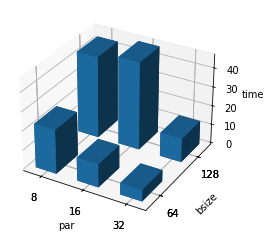

In [7]:
# create 3D grid plot

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# define lower coordinate of z axis
floor = np.zeros(num_vals)

# define width and depth of bars
width = 0.5
depth = 0.5

dpar1 = np.ones(num_vals)*width
dpar2 = np.ones(num_vals)*depth

ax1.bar3d(par1_coords, par2_coords, floor, dpar1, dpar2, performance)

ax1.set_xlabel(fields[PAR1_COL])
ax1.set_ylabel(fields[PAR2_COL])
ax1.set_zlabel(fields[PERFORMANCE_COL])

plt.xticks(par1_coords + width/2, par1)
plt.yticks(par2_coords + depth/2, par2)

plt.show()